# Coupled‐Wave Theory of Distributed Feedback Lasers

This page comprises simulations from the manuscript H. Kogelnik and C. V. Shank, *Coupled‐Wave Theory of Distributed Feedback Lasers*. Journal of Applied Physics, **43** (1972) 2327–2335. [doi:10.1063/1.1661499](https://doi.org/10.1063/1.1661499)

We compare the different simulations in the paper with our code.

In [2]:
from modes import *

## Dispersion diagram for index modulation for various gain to coupling parameter ratios

{numref}`Kogelnik1` calculates the dispersion diagram for index modulation for various gain ($\alpha_o$) to coupling ($\kappa$) parameter ratios. In case of index modulation we have that $\kappa= \pi n_1/\lambda_o$. We observe that the calculated result fits the result from {cite:p}`kogelnikCoupledWaveTheory1972`, as can be seen in {numref}`Kogelnik2`.

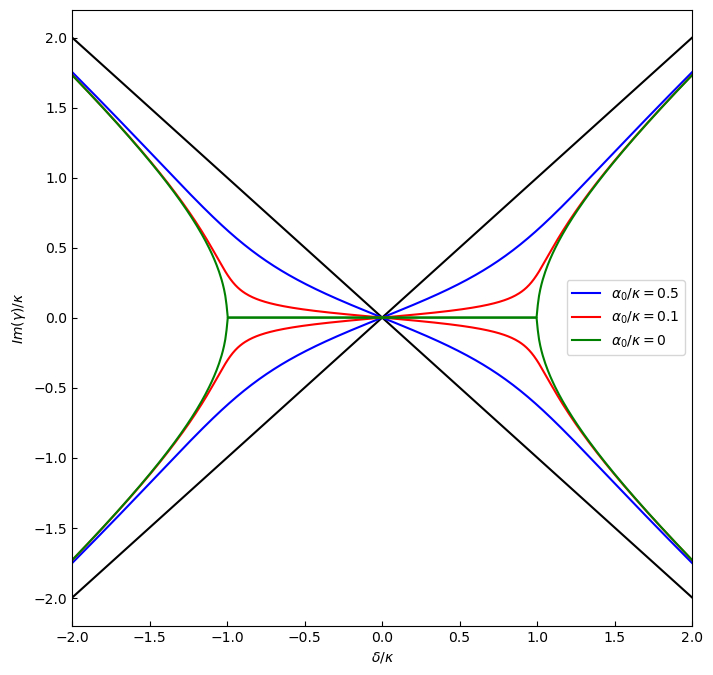

In [2]:
wc=np.linspace(-2,0,250)
gamma1=np.sqrt(1+(1/2-1.0j*wc)**2)
gamma2=np.sqrt(1+(1/10-1.0j*wc)**2)
gamma3=np.sqrt(1+(-1.0j*wc)**2)
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot([-2,2],[-2,2],c='black')
ax.plot([-2,2],[2,-2],c='black')
ax.plot(wc,np.imag(gamma1),c='blue',label=r'$\alpha_0 / \kappa =0.5 $')
ax.plot(wc,-np.imag(gamma1),c='blue');
ax.plot(-wc,np.imag(gamma1),c='blue')
ax.plot(-wc,-np.imag(gamma1),c='blue');
ax.plot(wc,np.imag(gamma2),c='red',label=r'$\alpha_0 / \kappa =0.1 $')
ax.plot(wc,-np.imag(gamma2),c='red')
ax.plot(-wc,np.imag(gamma2),c='red')
ax.plot(-wc,-np.imag(gamma2),c='red');
ax.plot(wc,np.imag(gamma3),c='green',label=r'$\alpha_0 / \kappa =0 $')
ax.plot(wc,-np.imag(gamma3),c='green')
ax.plot(-wc,np.imag(gamma3),c='green')
ax.plot(-wc,-np.imag(gamma3),c='green');
ax.set_xlabel(r'$\delta / \kappa$')
ax.set_ylabel(r'$Im(\gamma) / \kappa$')
ax.set_xlim(-2,2)
ax.tick_params(direction='in')
plt.legend();

```{figure} images/Kogelnik2.png
:name: Kogelnik2
:alt: Dispersion diagram 
:width: 100%
:align: center

Dispersion diagram for index modulation for various gain to coupling parameter ratios 
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

## Dispersion diagram for gain modulation for various gain to coupling parameter ratios


{numref}`Kogelnik3` calculates the dispersion diagram for index modulation for various gain ($\alpha_o$) to coupling ($\kappa$) parameter ratios. In case of index modulation we have that $\kappa= \frac{1}{2} j \alpha_1$. We observe that the calculated result fits {numref}`Kogelnik4`.


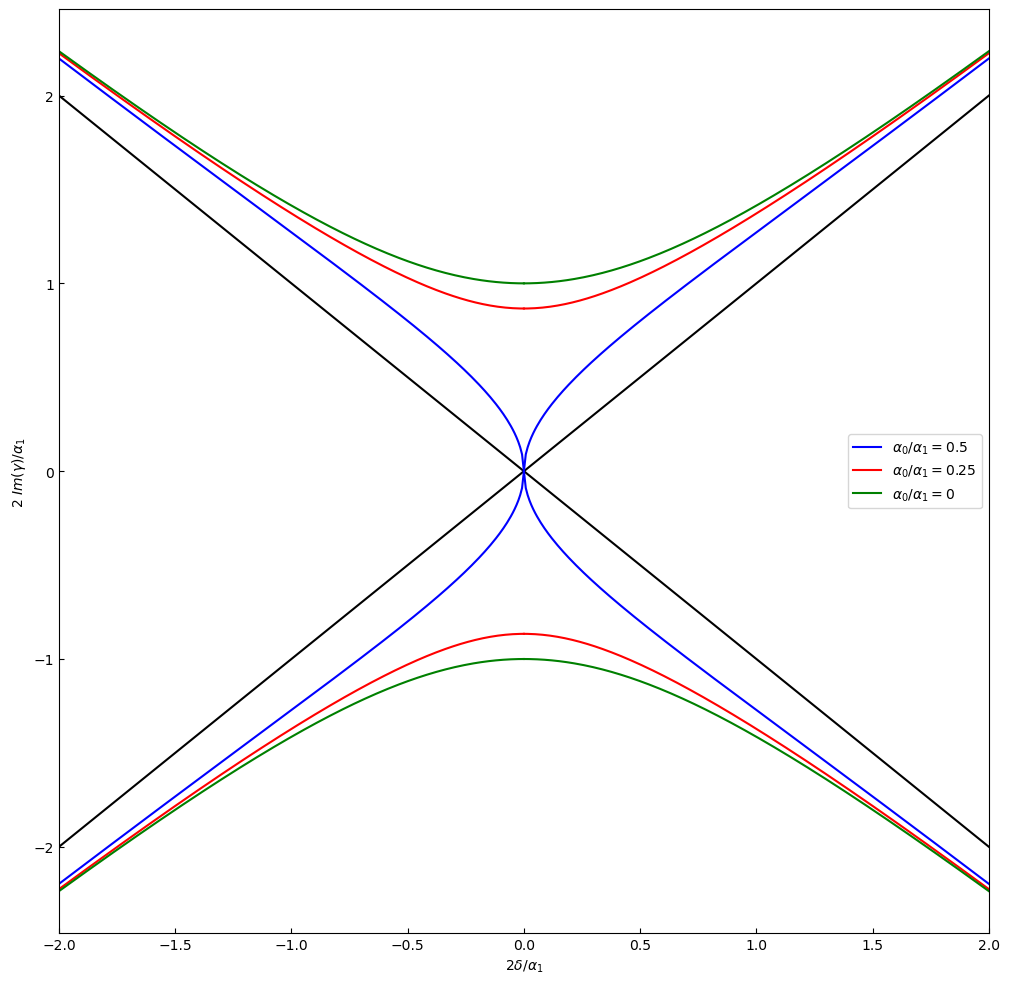

In [3]:
wc=np.linspace(-2,0,250)
gamma1=np.sqrt(-1+(1-1.0j*wc)**2)
gamma2=np.sqrt(-1+(1/2-1.0j*wc)**2)
gamma3=np.sqrt(-1+(-1.0j*wc)**2)
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot([-2,2],[-2,2],c='black')
ax.plot([-2,2],[2,-2],c='black')
ax.plot(wc,np.imag(gamma1),c='blue',label=r'$\alpha_0 / \alpha_1 =0.5 $')
ax.plot(wc,-np.imag(gamma1),c='blue');
ax.plot(-wc,np.imag(gamma1),c='blue')
ax.plot(-wc,-np.imag(gamma1),c='blue');
ax.plot(wc,np.imag(gamma2),c='red',label=r'$\alpha_0 / \alpha_1 =0.25 $')
ax.plot(wc,-np.imag(gamma2),c='red')
ax.plot(-wc,np.imag(gamma2),c='red')
ax.plot(-wc,-np.imag(gamma2),c='red');
ax.plot(wc,np.imag(gamma3),c='green',label=r'$\alpha_0 / \alpha_1 =0 $')
ax.plot(wc,-np.imag(gamma3),c='green')
ax.plot(-wc,np.imag(gamma3),c='green')
ax.plot(-wc,-np.imag(gamma3),c='green');
ax.set_xlabel(r'$2\delta / \alpha_1$')
ax.set_ylabel(r'2 $Im(\gamma) / \alpha_1$')
ax.set_xlim(-2,2)
ax.tick_params(direction='in')
plt.legend();

```{figure} images/Kogelnik4.png
:name: Kogelnik4
:alt: Dispersion diagram 
:width: 100%
:align: center

Dispersion diagram for gain modulation for various gain to coupling parameter ratios
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

## Mode spectrum for index coupling

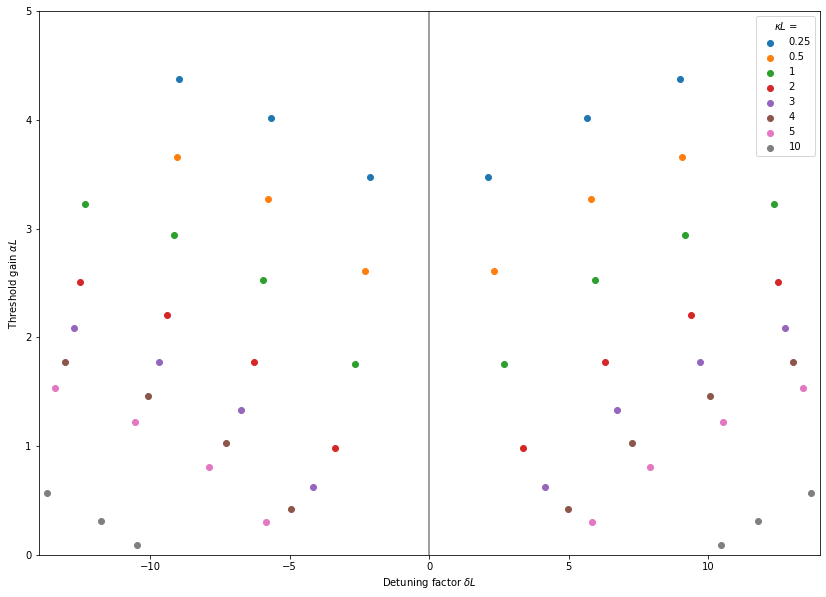

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def fff(x,kappa):
    return kappa*np.sinh(x)-1j*x

def dfff(x,kappa):
    return kappa*np.cosh(x)-1j

def glsol(kappa,node):
    xstart=1/np.sqrt(np.sinh(kappa/np.pi)) +(node-1)/(kappa**2/40+1) +1j*node*np.pi   
    nn= newton(fff, xstart, fprime=dfff,  args=(kappa,))
    if abs(nn.imag)>node*np.pi or abs(nn.imag)<(node-1)*np.pi:
        nn=newton(fff, xstart,  args=(kappa,))
        if abs(nn.imag)>node*np.pi or abs(nn.imag)<(node-1)*np.pi:
            return "NaN"
    return np.sqrt(nn**2-kappa**2)

fig, ax = plt.subplots(figsize=(14,10))
for k in [0.25,0.5,1,2,3,4,5,10]:
    fx1=[glsol(k,node) for node in range(1,5)]
    fx=[x for x in fx1 if np.iscomplex(x) ]
    ax.scatter([abs(x.imag) for x in fx ]+[-abs(x.imag) for x in fx ],[x.real for x in fx ]+[x.real for x in fx ], label=str(k))
ax.set_xlim(-14,14)
ax.set_ylim(0,5)
ax.axvline(color="grey")
ax.set_xlabel(r"Detuning factor $\delta L$")
ax.set_ylabel(r"Threshold gain $\alpha L$")
ax.legend(title=r"$\kappa L$ =");

```{figure} images/Kogelnik5.png
:name: Kogelnik5
:alt: gain required 
:width: 100%
:align: center

Plot of the gain required for threshold vs frequency deviation from the Bragg condition for an index modulation. Only half of the spectrum is shown because of symmetry. 
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

## Mode spectrum for gain coupling

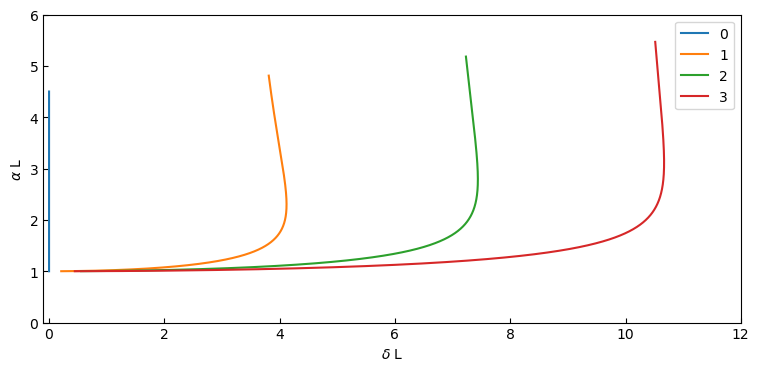

In [8]:
mode=[0,1,2,3]
aa=[0,2.9j,4.9j,6.9j]
kapaLmax=[1]+[abs(np.real((np.pi*a/2)/np.sinh(np.pi*a/2)))*0.997 for a in aa[1:] ]
fig, ax = plt.subplots(1,1,figsize=(9,4))
for mm,kLm,ar in zip(mode,kapaLmax,aa):
    testy=np.linspace(0.01,10,1500)
    testx=np.real((-1)**mm*(testy+np.pi*ar/2)/np.sinh(testy+np.pi*ar/2))
    kapaL=np.linspace(0.1,kLm,1500)
    gammaL=[optimize.newton(g, np.interp(kL, testx, testy+np.pi*ar/2), fprime=g1,fprime2=g2, args=((-1)**mm*1j*kL, )) for kL in kapaL]
    xx=(-1)**mm*kapaL*np.cosh(gammaL)
    ax.plot(np.imag(xx),np.real(xx),label=str(mm))
ax.set_xlabel(r'$\delta$ L')
ax.set_ylabel(r'$\alpha$ L')
ax.set_xlim(-0.1,12)
ax.set_ylim(0,6)
ax.tick_params(direction='in')
ax.legend();

```{figure} images/Kogelnik7.png
:name: Kogelnik7
:alt: gain required 
:width: 100%
:align: center

Plot of the DC gain required for threshold vs frequency deviation from the Bragg condition for gain modulation. Only half of the spectrum is shown because of symmetry. 
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

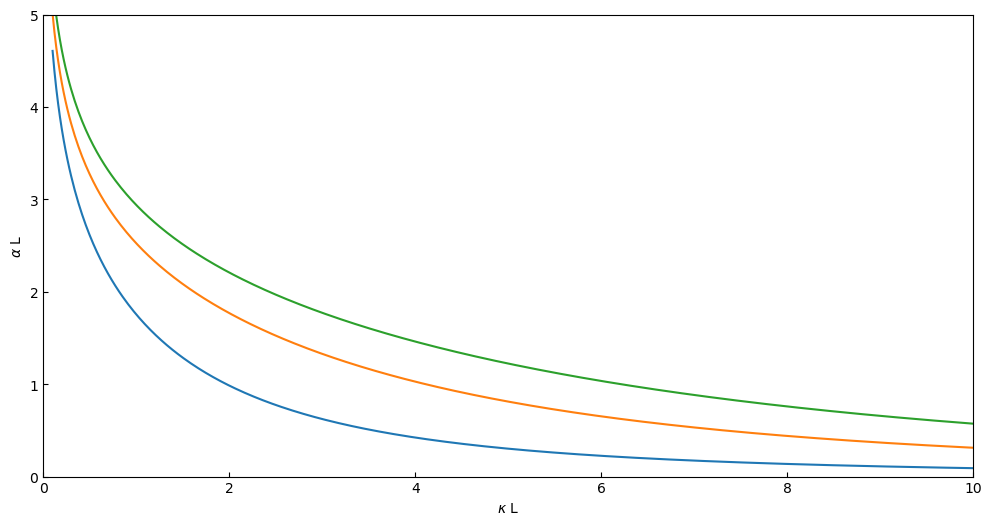

In [4]:
kapaL=np.linspace(0.1,10,500)
gammaL1=[optimize.newton(g, 2/kL**0.5+1j*np.pi, fprime=g1,fprime2=g2, args=(kL, )) for kL in kapaL]
gammaL2=[optimize.newton(g, 4/kL**0.5+2j*np.pi, fprime=g1,fprime2=g2, args=(-kL, )) for kL in kapaL]
gammaL3=[optimize.newton(g, 6/kL**0.5+3j*np.pi, fprime=g1,fprime2=g2, args=(kL, )) for kL in kapaL]
xx1=-1j*kapaL*np.cosh(gammaL1)
xx2=1j*kapaL*np.cosh(gammaL2)
xx3=-1j*kapaL*np.cosh(gammaL3)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(kapaL,np.real(xx1))
ax.plot(kapaL,np.real(xx2))
ax.plot(kapaL,np.real(xx3))
ax.set_xlabel(r'$\kappa$ L')
ax.set_ylabel(r'$\alpha$ L')
ax.set_xlim(0,10)
ax.set_ylim(0,5)
ax.tick_params(direction='in')

```{figure} images/Kogelnik8.png
:name: Kogelnik8
:alt: gain at threshold vs coupling strength 
:width: 100%
:align: center

Plot of the gain at threshold vs coupling strength for various modes. The mode number N refers to a set of modes placed symmetrically about the Bragg frequency. 
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

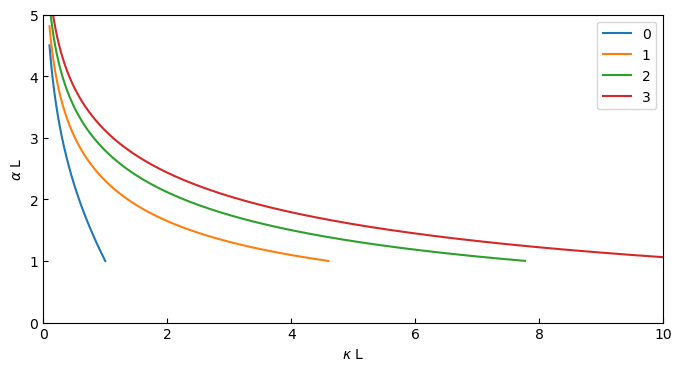

In [3]:
mode=[0,1,2,3]
aa=[0,2.9j,4.9j,6.9j]
kapaLmax=[1]+[abs(np.real((np.pi*a/2)/np.sinh(np.pi*a/2)))*0.997 for a in aa[1:] ]
fig, ax = plt.subplots(1,1,figsize=(8,4))
for mm,kLm,ar in zip(mode,kapaLmax,aa):
    testy=np.linspace(0.01,10,1500)
    testx=np.real((-1)**mm*(testy+np.pi*ar/2)/np.sinh(testy+np.pi*ar/2))
    kapaL=np.linspace(0.1,kLm,1500)
    gammaL=[optimize.newton(g, np.interp(kL, testx, testy+np.pi*ar/2), fprime=g1,fprime2=g2, args=((-1)**mm*1j*kL, )) for kL in kapaL]
    xx=(-1)**mm*kapaL*np.cosh(gammaL)
    ax.plot(kapaL,np.real(xx),label=str(mm))
ax.set_xlabel(r'$\kappa$ L')
ax.set_ylabel(r'$\alpha$ L')
ax.set_xlim(0,10)
ax.set_ylim(0,5)
ax.tick_params(direction='in')
ax.legend();

```{figure} images/Kogelnik9.png
:name: Kogelnik9
:alt: gain at threshold vs coupling strength 
:width: 100%
:align: center

Plot of the gain at threshold vs coupling strength for various modes. The N=O mode corresponds to a mode at the Bragg frequency. The numbers N>O correspond to a set of modes symmetrically placed about the Bragg frequency. 
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

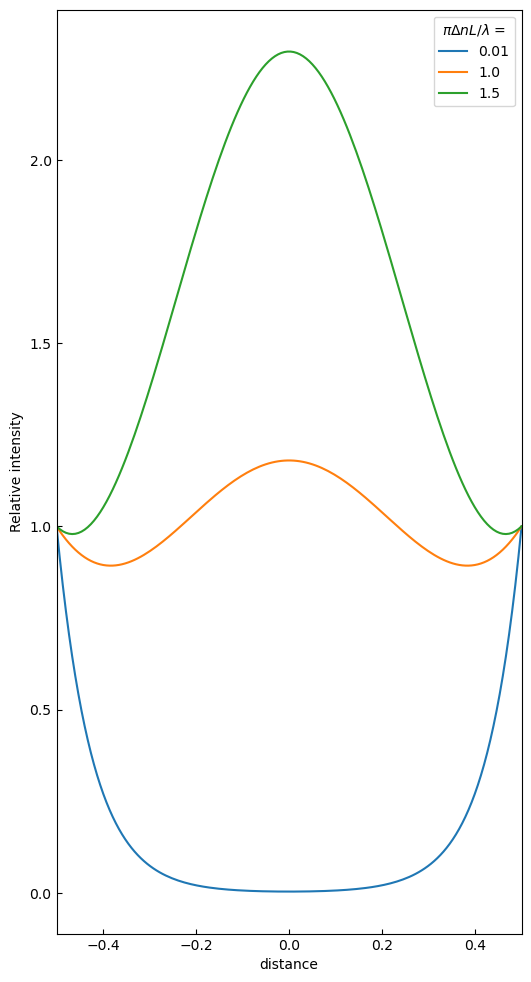

In [13]:
kapaL=[0.02,2,3]
gammaL1=[optimize.newton(g, 2/kL**0.5+1j*np.pi, fprime=g1,fprime2=g2, args=(kL, )) for kL in kapaL]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,1,figsize=(6,12))
for kL,gL in zip(kapaL,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax.plot(zz,I/Io,label=str(kL/2))

ax.set_xlabel(r'distance')
ax.set_ylabel(r'Relative intensity')
ax.set_xlim(-0.5,0.5)
ax.tick_params(direction='in')
plt.legend(title='$\pi \Delta n L/ \lambda$ =');

```{figure} images/Kogelnik10.png
:name: Kogelnik10
:alt: spatial intensity distribution 
:width: 100%
:align: center

Plot of the spatial intensity distribution of the lowest order modes at various coupling levels.
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

```{figure} images/Kogelnik11a.png
:name: Kogelnik11a
:alt: spatial intensity distribution
:align: center

Plot of the spatial intensity distribution for the first three modes at $\pi n_i L/\lambda=0.25$.
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

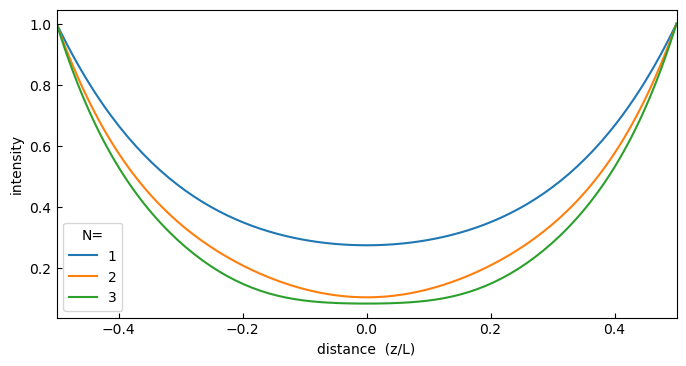

In [20]:
kL=0.75
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,1,figsize=(8,4))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax.plot(zz,I/Io,label=str(mm))

ax.set_xlabel(r'distance  (z/L)')
ax.set_ylabel(r'intensity')
ax.set_xlim(-0.5,0.5)
ax.tick_params(direction='in')
plt.legend(title="N=");

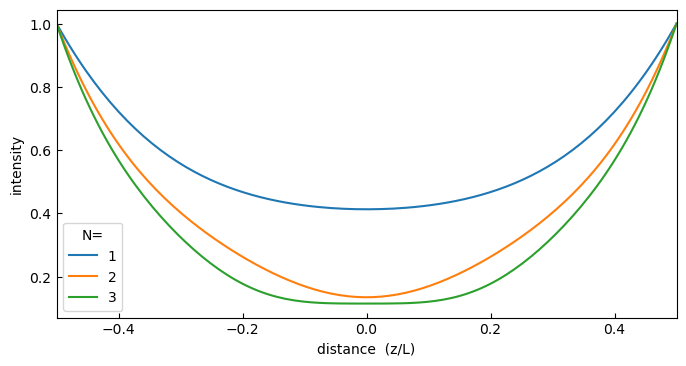

In [16]:
kL=1
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,1,figsize=(8,4))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax.plot(zz,I/Io,label=str(mm))

ax.set_xlabel(r'distance  (z/L)')
ax.set_ylabel(r'intensity')
ax.set_xlim(-0.5,0.5)
ax.tick_params(direction='in')
plt.legend(title="N=");

```{figure} images/Kogelnik11b.png
:name: Kogelnik11b
:alt: spatial intensity distribution 
:align: center

Plot of the spatial intensity distribution for the first three modes at $\pi n_i L/\lambda=1$.
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

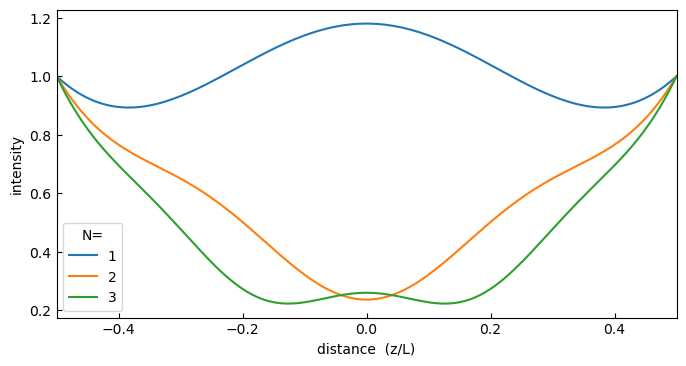

In [17]:
kL=2
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,1,figsize=(8,4))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax.plot(zz,I/Io,label=str(mm))

ax.set_xlabel(r'distance  (z/L)')
ax.set_ylabel(r'intensity')
ax.set_xlim(-0.5,0.5)
ax.tick_params(direction='in')
plt.legend(title="N=");

```{figure} images/Kogelnik11c.png
:name: Kogelnik11c
:alt: spatial intensity distribution 
:align: center

Plot of the spatial intensity distribution for the first three modes at $\pi n_i L/\lambda=2$.
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

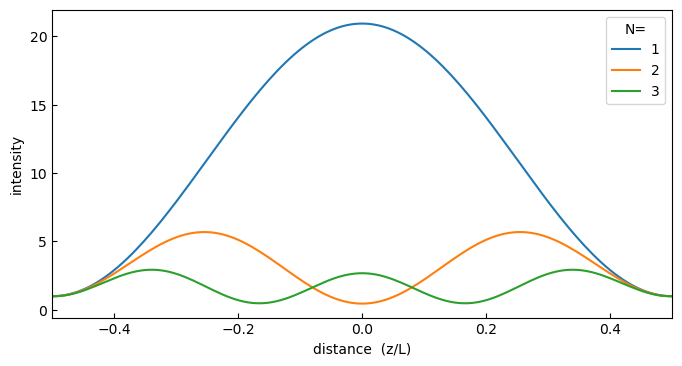

In [21]:
kL=10
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,1,figsize=(8,4))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax.plot(zz,I/Io,label=str(mm))

ax.set_xlabel(r'distance  (z/L)')
ax.set_ylabel(r'intensity')
ax.set_xlim(-0.5,0.5)
ax.tick_params(direction='in')
plt.legend(title="N=");

```{figure} images/Kogelnik11d.png
:name: Kogelnik11d
:alt: spatial intensity distribution 
:align: center

Plot of the spatial intensity distribution for the first three modes at $\pi n_i L/\lambda=10$. 
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

```{figure} images/Kogelnik12a.png
:name: Kogelnik12a
:alt: spatial intensity distribution 
:align: center

Plot of the spatial intensity distribution for the first three modes at $\alpha L / 2 =0.25$. 
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

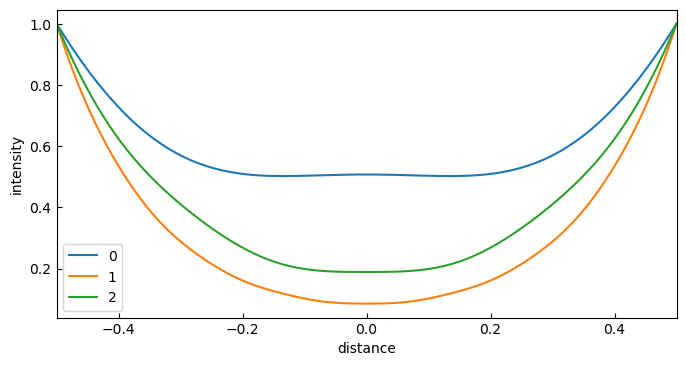

In [6]:
kL=-2j
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,1,figsize=(8,4))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax.plot(zz,I/Io,label=str(mm-1))

ax.set_xlabel(r'distance')
ax.set_ylabel(r'intensity')
ax.set_xlim(-0.5,0.5)
ax.tick_params(direction='in')
plt.legend();

```{figure} images/Kogelnik12b.png
:name: Kogelnik12b
:alt: spatial intensity distribution 
:align: center

Plot of the spatial intensity distribution for the first three modes at $\alpha L / 2 =1$. 
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

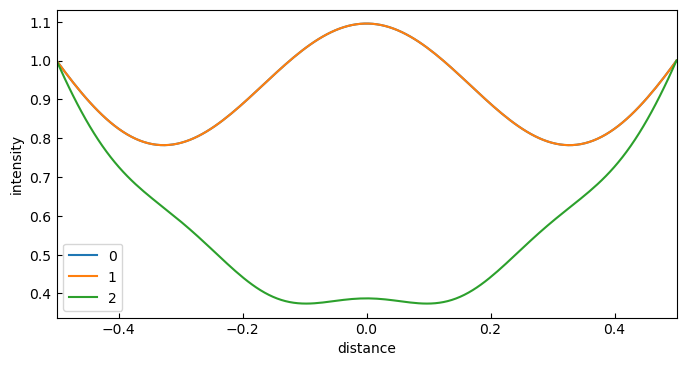

In [28]:
kL=-4j
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,1,figsize=(8,4))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax.plot(zz,I/Io,label=str(mm-1))

ax.set_xlabel(r'distance')
ax.set_ylabel(r'intensity')
ax.set_xlim(-0.5,0.5)
ax.tick_params(direction='in')
plt.legend();

```{figure} images/Kogelnik12c.png
:name: Kogelnik12c
:alt: spatial intensity distribution 
:align: center

Plot of the spatial intensity distribution for the first three modes at $\alpha L / 2 =2$.
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))

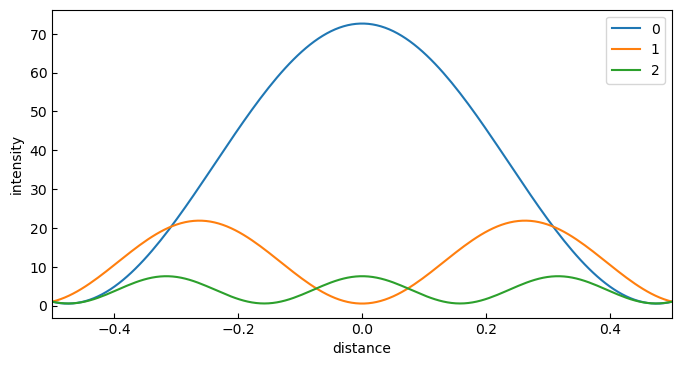

In [27]:
kL=-20j
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,1,figsize=(8,4))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax.plot(zz,I/Io,label=str(mm-1))

ax.set_xlabel(r'distance')
ax.set_ylabel(r'intensity')
ax.set_xlim(-0.5,0.5)
ax.tick_params(direction='in')
plt.legend();

```{figure} images/Kogelnik12d.png
:name: Kogelnik12d
:alt: spatial intensity distribution 
:align: center

Plot of the spatial intensity distribution for the first three modes at $\alpha L / 2 =10$. 
```

% from {cite:p}`kogelnikCoupledWaveTheory1972`   (to be added to the caption when cite from captions works in latex (how to use here the \protect))